#### import necessary libraries

In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

#### import the data and clean it 

In [162]:
# Read the ski resort dataset
ski_resort_df = pd.read_csv('skiResort.csv', encoding='ISO-8859-1')

def clean_ski_resort_data(df):
    df.columns = df.columns.str.strip()
    relevant_columns = ['State/Province', 'Altitude', 'Easy', 'Intermediate', 'Difficult']
    df = df[relevant_columns]
    df.dropna(inplace=True)      
    df['Altitude'] = df['Altitude'].astype(float)
    df['Easy'] = df['Easy'].astype(float)
    df['Intermediate'] = df['Intermediate'].astype(float)
    df['Difficult'] = df['Difficult'].astype(float)
    return df


#Clean the dataset
cleaned_ski_resort_df = clean_ski_resort_data(ski_resort_df)

# Load the precipitation data and clean it
precip_state_df = pd.read_csv('precip_state.csv')
precip_state_df.dropna(subset=['STATE', 'JAN'], inplace=True) 
precip_state_df['JAN'] = precip_state_df['JAN'].astype(float) 

# Load and clean the snowfall data
snow_state_df = pd.read_csv('snow_state.csv')
def clean_snowfall_data(df):
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
    df['24 hr New Snow'] = df['24 hr New Snow'].astype(str).str.replace(' cm', '').astype(float)
    df['Season Snowfall Total'] = df['Season Snowfall Total'].astype(str).str.replace(' cm', '').astype(float)
    df['Base Depth'] = df['Base Depth'].astype(str).str.replace(' cm', '').astype(float)
    df.dropna(subset=['Date', 'Season Snowfall Total'], inplace=True)
    return df

# Load the individual resort snowfall data
jackson_hole_df = pd.read_csv('Jackson Hole - Wyoming.csv')
snowbird_df = pd.read_csv('Snowbird - Utah.csv')
telluride_df = pd.read_csv('Telluride - Colorado.csv')

# Clean the resort snowfall data using function
jackson_hole_df = clean_snowfall_data(jackson_hole_df)
snowbird_df = clean_snowfall_data(snowbird_df)
telluride_df = clean_snowfall_data(telluride_df)

/var/folders/3h/2c5rpls550q5t_jwdflxbycm0000gn/T/ipykernel_11451/1259652337.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/3h/2c5rpls550q5t_jwdflxbycm0000gn/T/ipykernel_11451/1259652337.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/3h/2c5rpls550q5t_jwdflxbycm0000gn/T/ipykernel_11451/1259652337.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

#### create the plots 

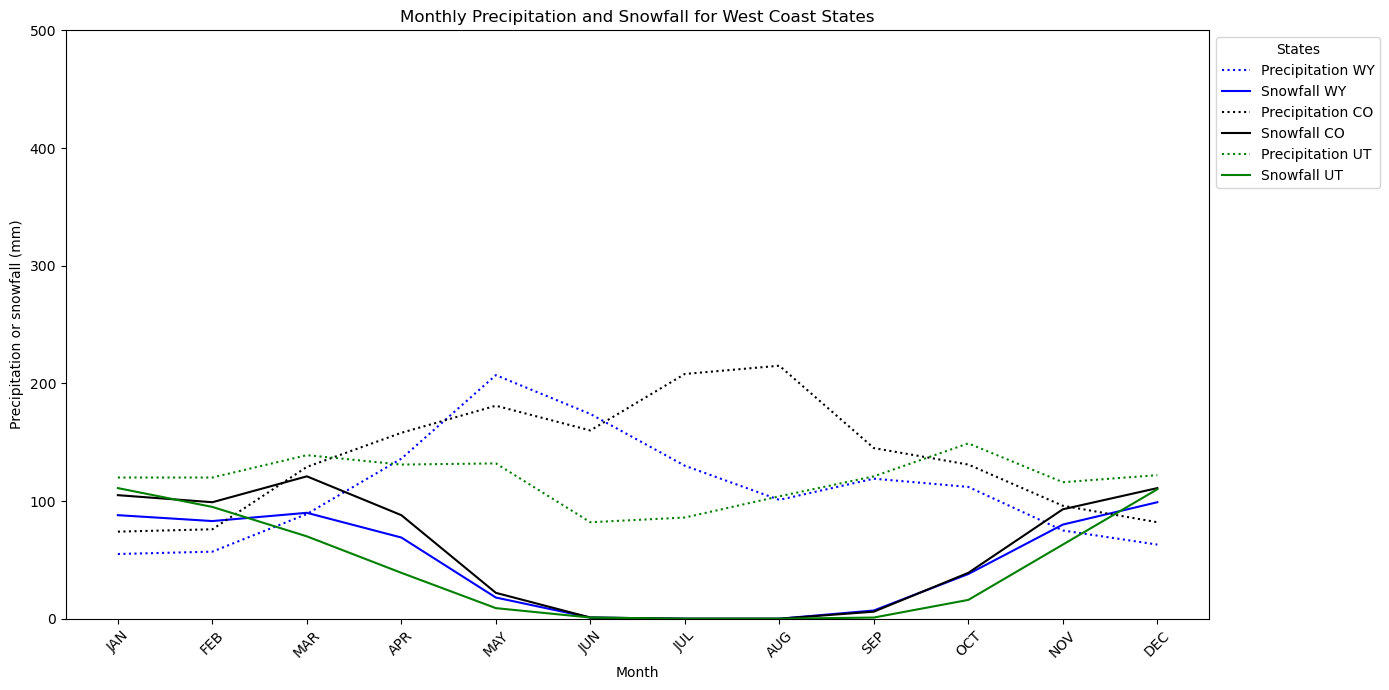

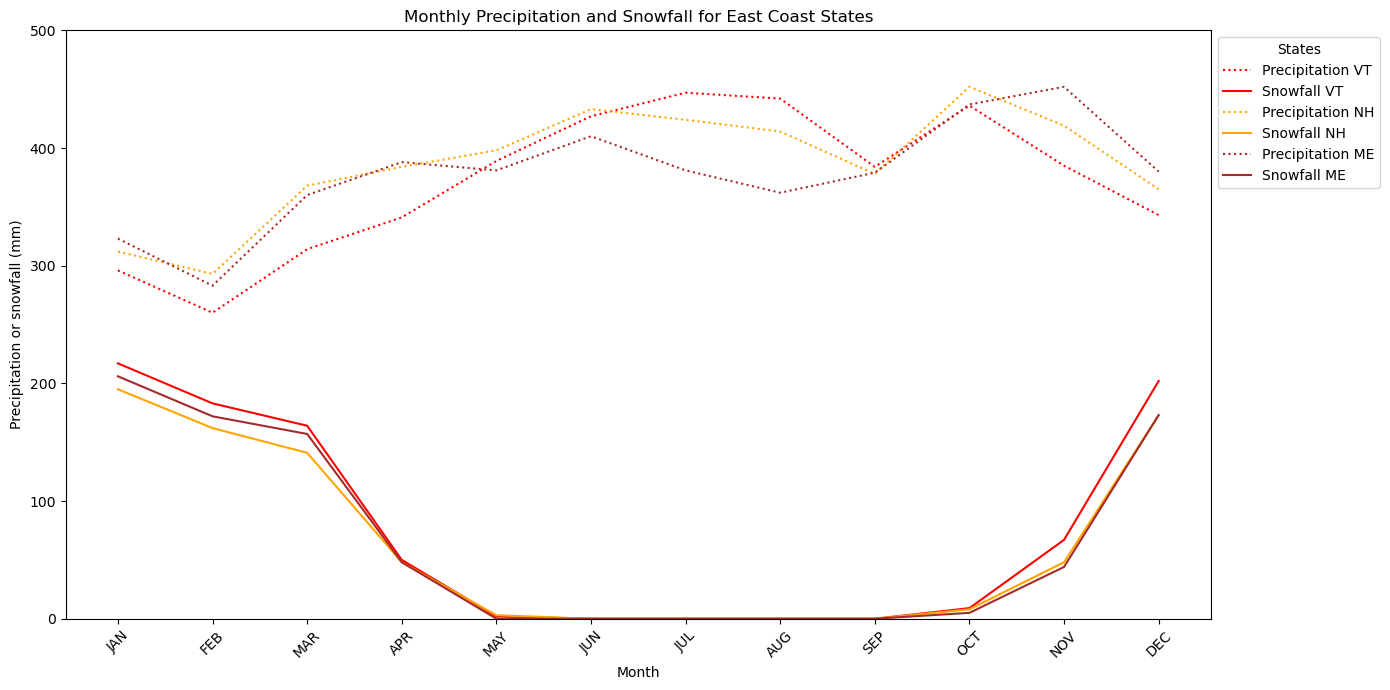

In [178]:
# Merge the precipitation and snowfall data
combined_precip_snow_df = pd.merge(precip_state_df, snow_state_df, on='STATE', suffixes=('_precip', '_snow'))
# Define the order of the months and state-color code
months = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']
state_colors = {'WY': 'blue', 'CO': 'black', 'UT': 'green','VT': 'red', 'NH': 'orange', 'ME': 'brown'}
# Define West Coast and East Coast states
west_coast_states = ['WY', 'CO', 'UT']
east_coast_states = ['VT', 'NH', 'ME']

# Plot west coast states 
plt.figure(figsize=(14, 7))
for state in west_coast_states:
    state_data = combined_precip_snow_df[combined_precip_snow_df['STATE'] == state]
    plt.plot(months, state_data.iloc[0, 1:13], label=f'Precipitation {state}', linestyle=':', color=state_colors[state])
    plt.plot(months, state_data.iloc[0, 13:], label=f'Snowfall {state}', linestyle='-', color=state_colors[state])

plt.xlabel('Month')
plt.ylabel('Precipitation or snowfall (mm)')
plt.title('Monthly Precipitation and Snowfall for West Coast States')
plt.legend(title='States', bbox_to_anchor=(1, 1), loc='upper left')
plt.xticks(rotation=45)
plt.ylim(0, 500)
plt.tight_layout()
plt.show()

# Plot east coast states 
plt.figure(figsize=(14, 7))
for state in east_coast_states:
    state_data = combined_precip_snow_df[combined_precip_snow_df['STATE'] == state]
    plt.plot(months, state_data.iloc[0, 1:13], label=f'Precipitation {state}', linestyle=':', color=state_colors[state])
    plt.plot(months, state_data.iloc[0, 13:], label=f'Snowfall {state}', linestyle='-', color=state_colors[state])

plt.xlabel('Month')
plt.ylabel('Precipitation or snowfall (mm)')
plt.title('Monthly Precipitation and Snowfall for East Coast States')
plt.legend(title='States', bbox_to_anchor=(1, 1), loc='upper left')
plt.xticks(rotation=45)
plt.ylim(0, 500)
plt.tight_layout()
plt.show()

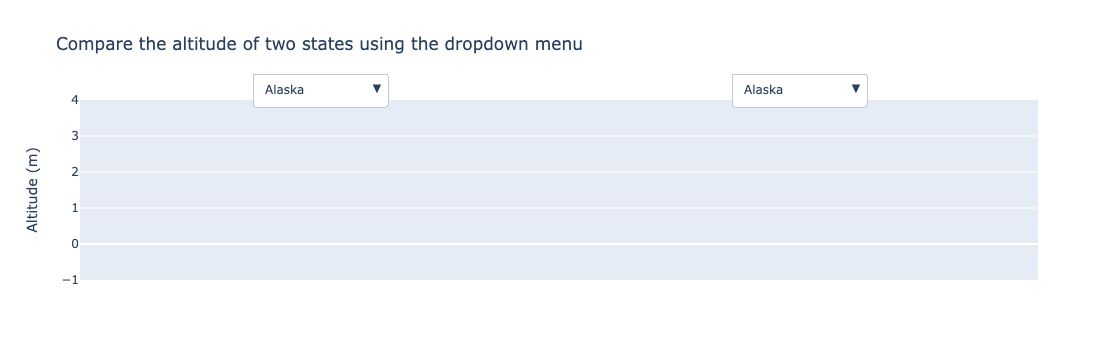

In [186]:
# Define US states
us_states = [
    'Alaska', 'Arizona', 'California', 'Colorado', 'Idaho', 'Maine', 
    'Michigan', 'Minnesota', 'Montana', 'Nevada', 'New Hampshire',
    'New Mexico', 'New York', 'North Carolina', 'Oregon', 'Pennsylvania',
    'South Dakota', 'Utah', 'Vermont', 'Virginia', 'Washington', 
    'West Virginia', 'Wyoming'
]

# Filter for US states 
us_ski_resort_df = cleaned_ski_resort_df[cleaned_ski_resort_df['State/Province'].isin(us_states)]

fig = go.Figure()

# Add initial empty traces and color code them 
fig.add_trace(go.Box(name='State 1',marker_color='blue',line_color='blue',fillcolor='rgba(0, 0, 255, 0.5)'))
fig.add_trace(go.Box(name='State 2',marker_color='green',line_color='green',fillcolor='rgba(0, 255, 0, 0.5)'))

# State 1 dropdown
dropdown1 = {'buttons': [{'method': 'restyle','label': state,'args': [{'y': [us_ski_resort_df[us_ski_resort_df['State/Province'] == state]['Altitude']]},
                [0]]} for state in us_states],'direction': 'down','showactive': True,'x': 0.25,'xanchor': 'center','y': 1.15,'yanchor': 'top'}

# State 2 dropdown
dropdown2 = {'buttons': [{
            'method': 'restyle',
            'label': state,
            'args': [
                {'y': [us_ski_resort_df[us_ski_resort_df['State/Province'] == state]['Altitude']]},
                [1]]} for state in us_states],'direction': 'down','showactive': True,'x': 0.75,'xanchor': 'center','y': 1.15,'yanchor': 'top'}

fig.update_layout(
    updatemenus=[dropdown1, dropdown2],
    title='Compare the altitude of two states using the dropdown menu',
    yaxis_title='Altitude (m)',
    boxmode='group'
)

fig.show()

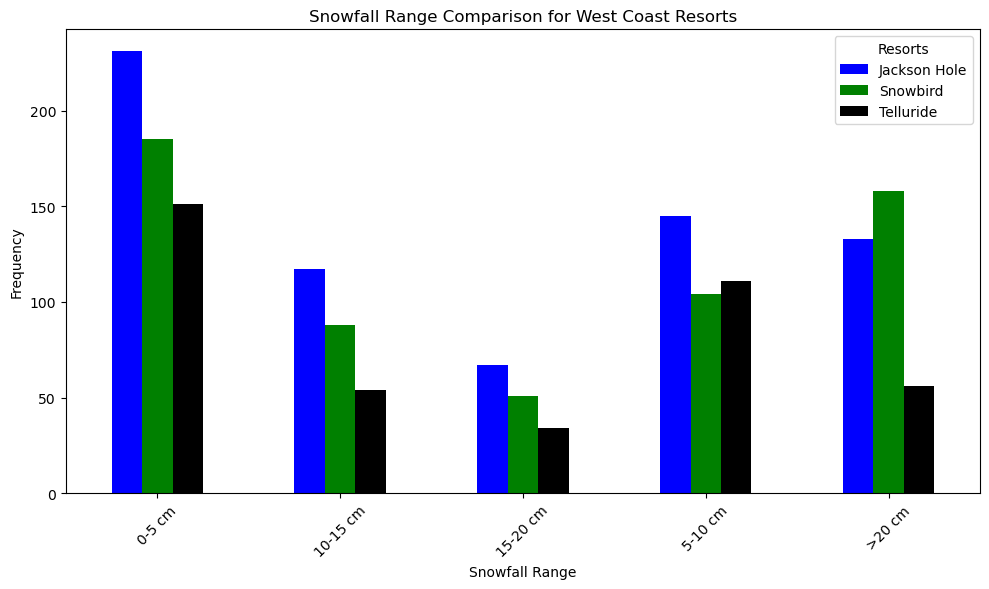

In [210]:
# categorize the snowfall into ranges
def categorize_snowfall(snowfall):
    if snowfall <= 5:
        return '0-5 cm'
    elif 5 < snowfall <= 10:
        return '5-10 cm'
    elif 10 < snowfall <= 15:
        return '10-15 cm'
    elif 15 < snowfall <= 20:
        return '15-20 cm'
    else:
        return '>20 cm'

# Add the categorization to each resort's data and count the frequency of each range
jackson_hole_df['Snowfall Range'] = jackson_hole_df['24 hr New Snow'].apply(categorize_snowfall)
snowbird_df['Snowfall Range'] = snowbird_df['24 hr New Snow'].apply(categorize_snowfall)
telluride_df['Snowfall Range'] = telluride_df['24 hr New Snow'].apply(categorize_snowfall)

jackson_hole_counts = jackson_hole_df['Snowfall Range'].value_counts().sort_index()
snowbird_counts = snowbird_df['Snowfall Range'].value_counts().sort_index()
telluride_counts = telluride_df['Snowfall Range'].value_counts().sort_index()

# Combine the counts into one dataframe
snowfall_comparison_df = pd.DataFrame({'Jackson Hole': jackson_hole_counts,'Snowbird': snowbird_counts,'Telluride': telluride_counts}).fillna(0)  

# Plot the bar chart 
snowfall_comparison_df.plot(kind='bar', stacked=False, figsize=(10, 6), color=['blue', 'green', 'black'])
plt.title('Snowfall Range Comparison for West Coast Resorts')
plt.xlabel('Snowfall Range')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend(title='Resorts')
plt.tight_layout()
plt.show()


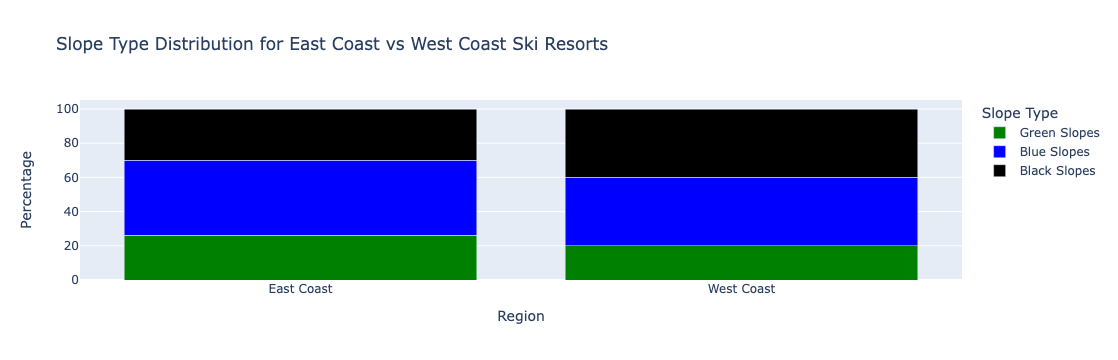

In [206]:
# Define east and west coast states and split the data 
east_coast_states = ['Vermont', 'New Hampshire', 'Maine']
west_coast_states = ['Wyoming', 'Utah', 'Colorado']
east_coast_df = slopes_data[slopes_data['state'].isin(east_coast_states)]
west_coast_df = slopes_data[slopes_data['state'].isin(west_coast_states)]

# Sum the percentages for each slope type and normalize the data 
east_coast_slopes = east_coast_df[['green_percent', 'blue_percent', 'black_percent']].sum()
west_coast_slopes = west_coast_df[['green_percent', 'blue_percent', 'black_percent']].sum()
east_coast_total = east_coast_slopes.sum()
west_coast_total = west_coast_slopes.sum()
east_coast_slopes_normalized = (east_coast_slopes / east_coast_total) * 100
west_coast_slopes_normalized = (west_coast_slopes / west_coast_total) * 100

# Combine into a singular dataframe
slopes_comparison = pd.DataFrame({
    'Slope Type': ['Green Slopes', 'Blue Slopes', 'Black Slopes'],
    'East Coast': east_coast_slopes_normalized.values,
    'West Coast': west_coast_slopes_normalized.values
})

# Convert the data into proper format
slopes_comparison_long = pd.melt(slopes_comparison, id_vars=['Slope Type'], value_vars=['East Coast', 'West Coast'],var_name='Region', value_name='Percentage')

# Create a Plotly stacked bar chart for interactions
fig = px.bar(slopes_comparison_long,x='Region', y='Percentage', color='Slope Type',
             title='Slope Type Distribution for East Coast vs West Coast Ski Resorts',
             labels={'Percentage': 'Percentage', 'Region': 'Region', 'Slope Type': 'Slope Type'},
             color_discrete_map={'Green Slopes': 'green', 'Blue Slopes': 'blue', 'Black Slopes': 'black'})

# Update layout
fig.update_layout(barmode='stack',  xaxis_title="Region", yaxis_title="Percentage", legend_title="Slope Type")
fig.show()

In [63]:
slopes_data.count()

resort_name      364
state            364
summit           334
base             333
vertical         363
lifts            363
runs             361
acres            364
green_percent    357
green_acres      364
blue_percent     360
blue_acres       364
black_percent    351
black_acres      364
lat              363
lon              364
dtype: int64